In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/2016-11-19-reimbursements.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str},
                   low_memory=False)
data = data[data['year'] == 2016]

In [3]:
tot_deputado = \
   data.groupby(['party', 'state', 'applicant_id', 'congressperson_name'], as_index=False)\
   .aggregate({'total_net_value': np.sum})

tot_deputado.sort_values(by='total_net_value', ascending=False).head()

,party,state,applicant_id,congressperson_name,total_net_value
521,PTN,PA,2916,FRANCISCO CHAPADINHA,600098.37
7,DEM,MA,3020,JUSCELINO FILHO,449997.35
91,PMDB,MA,3035,HILDO ROCHA,447773.16
341,PSD,CE,2329,DOMINGOS NETO,433255.67
394,PSDB,MS,3093,ELIZEU DIONIZIO,428584.27


In [4]:
tot_deputado = \
   data.groupby(['applicant_id', 'party', 'state', 'congressperson_name'])\
   .aggregate({'total_net_value': np.sum})

tot_deputado[200:250]

,,,,total_net_value
applicant_id,party,state,congressperson_name,
1935,PTB,RS,SÉRGIO MORAES,189284.31
1945,PSB,SE,VALADARES FILHO,228662.71
1946,PMDB,MT,VALTENIR PEREIRA,291033.78
1947,PSDB,SP,VANDERLEI MACRIS,326533.04
1951,PRB,SP,VINICIUS CARVALHO,339254.32
1954,PP,MA,WALDIR MARANHÃO,8300.10
1958,PP,SP,WILLIAM WOO,65889.84
1962,PMDB,MT,CARLOS BEZERRA,323830.75
1963,PT,SP,CARLOS ZARATTINI,251123.54


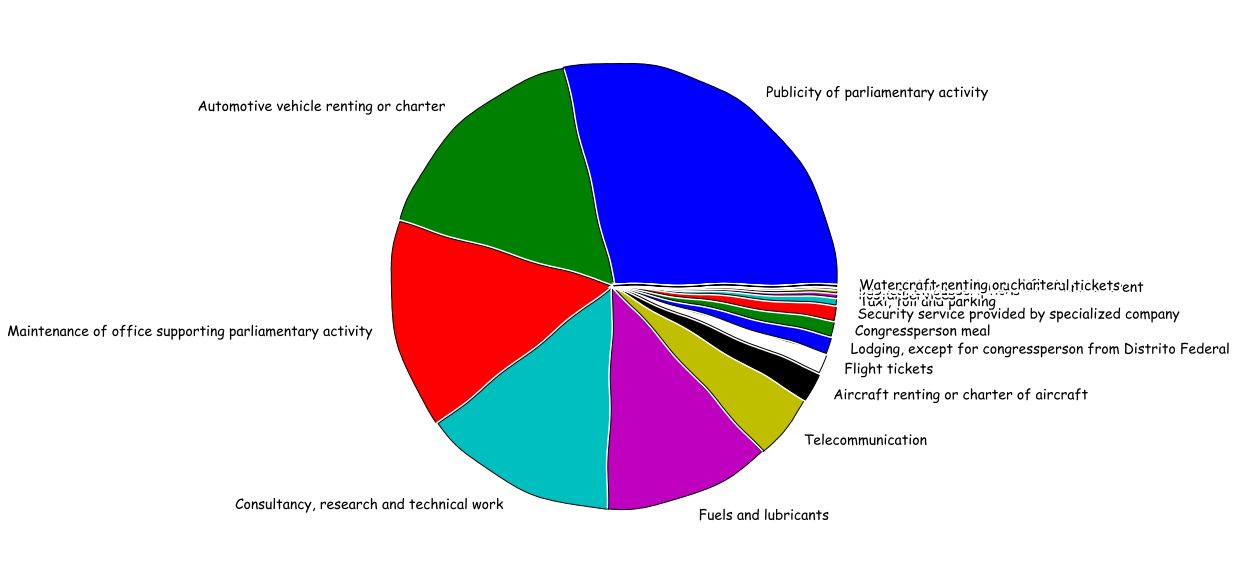

In [5]:
tot = data.groupby(['subquota_number', 'subquota_description'], as_index=False)\
   .agg({'total_net_value': np.nansum})\
   .sort_values(by='total_net_value', ascending=False)

plt.xkcd()
plt.figure(figsize=(10,10))
plt.pie(tot.total_net_value, labels=tot.subquota_description)
plt.show()

In [6]:
data.groupby(['cnpj_cpf', 'supplier'
             ], as_index=False)\
   .agg({'total_net_value': np.nansum})\
   .sort_values(by='total_net_value', ascending=False)[0:20]

,cnpj_cpf,supplier,total_net_value
16565,22005529000130,DOUGLAS CUNHA DA SILVA ME,1716000.32
2476,02558157000162,TELEFÔNICA BRASIL S.A.,972546.57
12418,13230334000101,InCine Video Ltda - ME,954280.00
11525,11630318000172,BRASÍLIA COMUNICAÇÃO E PUBLICIDADE,524499.98
13546,15193908000136,JOSELY FERNANDA DO NASCIMENTO,519500.00
9729,09400977000170,MARCHIORI E MARCHIORI LTDA ME,468500.00
2591,02610235000120,DMD GESTÃO ADM. LTDA,441000.04
5807,05443449000148,Vértice Associados,430900.00
2466,02558157000162,TELEFONICA BRASIL S.A.,412850.65
16472,21793072000103,CARVALHO & CARDOSO ADVOGADOS ASSOCIADOS,412700.00


In [7]:
data.groupby(['subquota_group_id', 'subquota_group_description'], as_index=False)\
   .agg({'total_net_value': np.nansum})\
   .sort_values(by='total_net_value', ascending=False)[0:10]

,subquota_group_id,subquota_group_description,total_net_value
0,0,nan,1.156334e+08
1,1,Veículos Automotores,1.550921e+07
3,3,Aeronaves,3.588997e+05
4,4,Sem especificações,5.719363e+04
2,2,Embarcações,1.044057e+04


In [8]:
data.groupby(['year', 'month'], as_index=False)\
   .agg({'total_net_value': np.nansum})\
   .sort_values(by='month', ascending=True)[0:15]


,year,month,total_net_value
0,2016,1,11056696.93
1,2016,2,13129379.29
2,2016,3,15024158.53
3,2016,4,14587022.44
4,2016,5,15094925.70
5,2016,6,13875954.42
6,2016,7,13050809.78
7,2016,8,13626928.02
8,2016,9,12069228.38
9,2016,10,8902486.17


In [9]:
print('Type of receipt — 0 (zero) for bill of sale; 1 (one) for simple receipt; and 2 (two) to expense made abroad.')
data.groupby(['document_type'], as_index=False)\
   .agg({'total_net_value': np.nansum})\
   .sort_values(by='total_net_value', ascending=False).head()

Type of receipt — 0 (zero) for bill of sale; 1 (one) for simple receipt; and 2 (two) to expense made abroad.


,document_type,total_net_value
0,0,1.039933e+08
1,1,2.727041e+07
2,2,2.279256e+05
3,3,7.749408e+04
